using pca and lda model
(10601, 32)


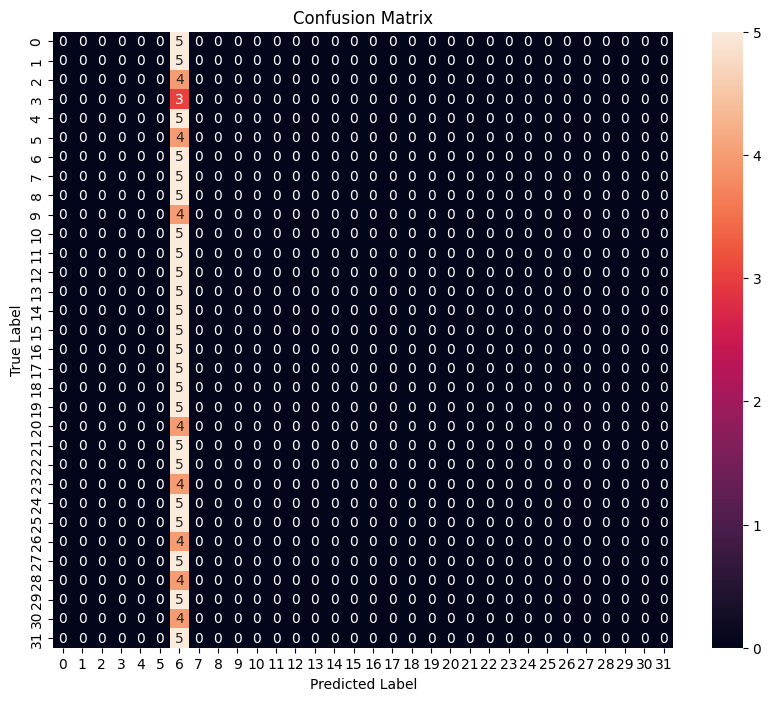

Accuracy: 1.0 0.03333333333333333


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_dir = 'dimension_reduced_data'

use_pca = True
use_lda = True

if use_pca and not use_lda:
    print('using pca model')

    X_train = np.load('dimension_reduced_data/X_train_pca.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca.npy')
    # with open('dimension_reduced_data/pca_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

if use_lda and not use_pca:
    print('using lda model')

    X_train = np.load('dimension_reduced_data/X_train_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_lda.npy')
    # with open('dimension_reduced_data/lda_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

if use_pca and use_lda:
    print('using pca and lda model')

    X_train = np.load('dimension_reduced_data/X_train_pca_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca_lda.npy')
    # with open('dimension_reduced_data/pca_lda_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

y_train = np.load('dimension_reduced_data/y_train.npy')
y_val = np.load('dimension_reduced_data/y_val.npy')

print(X_train.shape)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values, should be expanded based on the specific problem
    'gamma': [0.001, 0.0001, 'scale', 'auto'],  # Example values plus 'scale' and 'auto'
    'kernel': ['rbf']
}


svc = SVC()
model =  SVC(kernel='rbf', C=1, gamma='auto') #GridSearchCV(svc, param_grid, cv=5, verbose=2)  # 5-fold cross-validation
model.fit(X_train, y_train)

yp = model.predict(X_train)
training_accuracy = accuracy_score(y_train, yp)

yp = model.predict(X_val)


cm = confusion_matrix(y_val, yp)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()



validation_accuracy = accuracy_score(y_val, yp)

print("Accuracy:",training_accuracy, validation_accuracy)
